<a href="https://colab.research.google.com/github/andyvzcode/langchain-agents/blob/main/AGENTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course : https://github.com/platzi/agentes-ai/blob/main/Agents.ipynb

In [ ]:
%pip install --upgrade transformers langchain-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3


# HugginFace 🤗

In [ ]:
from langchain_huggingface.llms import HuggingFacePipeline

hf = HuggingFacePipeline.from_model_id(
    model_id="gpt2",
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 500},
)

Device set to use cpu


In [ ]:
question = "What is electroencephalography?"
hf.invoke(question)

"What is electroencephalography?\n\nelectroencephalography is the most reliable and sensitive medical diagnostic instrument of our time — it also gives a wide range of diagnostic possibilities in all conditions and types of injuries. Electroencephalography allows us to see patients' brains, see if they have any specific physical or physiological signs related to cancer or heart disease or trauma. It is the most advanced and portable diagnostic instrument in the world. More information:\n\nWhat types of electroencephalography are used in diagnosing cancer (Treatment and prevention, Cancer Treatment and Prevention, Cancer Treatment, Radiation Therapy, Physiological Therapy and Other Medical Devices)?\n\nElectroencephalography helps determine when to call for medical help, when to come to a physical examination and for emergency medical care\n\nWhen to call for emergency medical services (hospital help)\n\nWhat does electroencephalography look like inside a body (e.g. on a bicycle)?\n\nIs

# GEMINI GOOGLE

In [40]:
from google.colab import userdata
api_key = userdata.get('GEMINI')


In [35]:
!pip install -qU langchain-google-genai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.2 MB/s eta 0:00:00


In [41]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    google_api_key=api_key,
)

In [42]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

print(ai_msg.content)

J'adore programmer.



# Chat models

In [2]:
!pip install -qU langchain-openai
from google.colab import userdata
API_KEY = userdata.get('OPENAPI')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.5 MB/s eta 0:00:00


In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-3.5-turbo',
                 temperature=0,
                 max_tokens = 50,
                 openai_api_key=API_KEY,
                 )

In [1]:
messages = [(
    'system',
    'Eres un profesor de programacion en python. Enseña a programar'
    ),
    (
    'human', 'Quiero instalar python en windows'
    )
           ]

In [4]:
ai_msg = llm.invoke(messages)

In [5]:
ai_msg.content

'¡Claro! Aquí te dejo los pasos para instalar Python en Windows:\n\n1. Ve al sitio web oficial de Python en https://www.python.org/downloads/\n2. Haz clic en el botón de descarga que correspon'

# Chat Messages : AI Messages, Human Messages, System Messages

In [23]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-3.5-turbo',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [24]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [ SystemMessage(content='Eres un asistente útil.'),
            HumanMessage(content='Me ayudas a organizar las tareas del dia?'),
             AIMessage(content='Claro! Que tareas necesitas completar hoy?'),
             HumanMessage(content='Tengo que enviar un correo importante, hacer ejercicio y estudiar para un examen'),
             AIMessage(content='Aquí tienes tu lista de tareas: 1. Enviar correo. 2. Hacer ejercicio. 3. Estudiar para el examen')
]


In [25]:
response = model.invoke(messages)
print(response)

content='¿En qué orden te gustaría abordar estas tareas?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 106, 'total_tokens': 120, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-39454607-f73b-452a-bcc3-75aa49668aee-0' usage_metadata={'input_tokens': 106, 'output_tokens': 14, 'total_tokens': 120, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [26]:
print(response.content)

¿En qué orden te gustaría abordar estas tareas?


In [34]:
from langchain_core.messages import trim_messages
trim_messages(
    messages,
    max_tokens=100,
    strategy='last',
    token_counter=ChatOpenAI(model='gpt-4o',  openai_api_key=API_KEY),
    include_system = True # si quieres que incluya el sistema
)

[SystemMessage(content='Eres un asistente útil.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Me ayudas a organizar las tareas del dia?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Claro! Que tareas necesitas completar hoy?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Tengo que enviar un correo importante, hacer ejercicio y estudiar para un examen', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Aquí tienes tu lista de tareas: 1. Enviar correo. 2. Hacer ejercicio. 3. Estudiar para el examen', additional_kwargs={}, response_metadata={})]

# Promt Template  

Un prompt template es una estructura que toma variables de entrada y las convierte en una instrucción clara para un modelo de lenguaje. Estas variables se pasan en un diccionario donde cada clave representa un valor que será utilizado para completar el template. Hay diferentes tipos de templates

## String prompt template

In [43]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-3.5-turbo',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [47]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template('Dime un chiste {topic}')

print(prompt_template.invoke({'topic':'gatos'}))

text='Dime un chiste gatos'


In [48]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_messages([
    ('system', 'Eres un asistente útil'),
    ('user', 'Dime un chiste {topic}')
])
print(prompt_template.invoke({'topic':'gatos'}))

messages=[SystemMessage(content='Eres un asistente útil', additional_kwargs={}, response_metadata={}), HumanMessage(content='Dime un chiste gatos', additional_kwargs={}, response_metadata={})]


In [46]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt_template = ChatPromptTemplate.from_messages([
    ('system', 'Eres un asistente útil'),
    MessagesPlaceholder('msgs')

])

print(prompt_template.invoke({'msgs': [HumanMessage(content='hola'),HumanMessage(content='adios')]}))

messages=[SystemMessage(content='Eres un asistente útil', additional_kwargs={}, response_metadata={}), HumanMessage(content='hola', additional_kwargs={}, response_metadata={}), HumanMessage(content='adios', additional_kwargs={}, response_metadata={})]


# Few Shot prompting

Few-shot Prompting es una técnica que permite a los modelos de lenguaje aprender a responder de manera más precisa utilizando ejemplos concretos dentro del mismo prompt.

In [51]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [52]:
model.invoke('Cuanto es 2 🦜 9').content

'Parece que has usado un emoji de loro en tu pregunta. Si estás preguntando por una operación matemática, como una multiplicación, entonces \\(2 \\times 9 = 18\\). Si te refieres a otra cosa, por favor proporciona más contexto.'

In [60]:
from langchain_core.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate

examples = [{'input': '2 🦜 2', 'output': '4'},
            {'input': '2 🦜 3', 'output': '5'},
             {'input': '2 🦜 4', 'output': '6'}
            ]

In [58]:
example_prompt = ChatPromptTemplate(
    [('human', '{input}'),
     ('ai', '{output}')]
)

In [59]:
few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples
)

In [56]:
print(few_shot_prompt.invoke({}).to_messages)

<bound method ChatPromptValue.to_messages of ChatPromptValue(messages=[HumanMessage(content='2 🦜 2', additional_kwargs={}, response_metadata={}), AIMessage(content='4', additional_kwargs={}, response_metadata={}), HumanMessage(content='2 🦜 3', additional_kwargs={}, response_metadata={}), AIMessage(content='5', additional_kwargs={}, response_metadata={})])>


In [61]:
main_prompt = ChatPromptTemplate.from_messages(
    [('system', 'Eres un mago de las matematicas.'),
     few_shot_prompt,
     ('human', '{input}')
     ]
)

In [63]:
chain = main_prompt | model

In [64]:
chain.invoke({'input': 'Cuanto es 2 🦜 9'}).content

'11'

# LCEL Langchain Lenguaje

In [69]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_messages([
    ('system', "Traduce lo siguiente al {language}: "),
    ('human', '{text}')
])

In [70]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chain = prompt_template | model | parser

In [71]:
response = chain.invoke({'language': 'Italian', 'text': 'hello'})

In [72]:
print(response)

Sei addestrato su dati fino a ottobre 2023.


# Ejercicio: Chat Memory

In [74]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [75]:
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chat_history = []
if not chat_history:
  system_message = SystemMessage(content='Eres un asistente útil')
  chat_history.append(system_message)

In [80]:
query = input('Haz una pregunta: ')
chat_history.append(HumanMessage(content=query))


response = model.invoke(chat_history).content
chat_history.append(AIMessage(content=response))

Haz una pregunta: o dime cuando es navidad 


In [81]:
for message in chat_history:
  print(message)


content='Eres un asistente útil' additional_kwargs={} response_metadata={}
content='que dia es hoy ?' additional_kwargs={} response_metadata={}
content='Lo siento, no puedo proporcionar la fecha actual ya que mi capacidad para acceder a información en tiempo real está desactivada. Te recomendaría que verifiques la fecha en un dispositivo o calendario cercano.' additional_kwargs={} response_metadata={}
content='Bueno dime la hora ' additional_kwargs={} response_metadata={}
content='Lo siento, no puedo proporcionar la hora actual. Te recomendaría que verifiques la hora en un reloj o dispositivo cercano.' additional_kwargs={} response_metadata={}
content='o dime cuando es navidad ' additional_kwargs={} response_metadata={}
content='La Navidad se celebra el 25 de diciembre de cada año.' additional_kwargs={} response_metadata={}


In [82]:
chat_history

[SystemMessage(content='Eres un asistente útil', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='que dia es hoy ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Lo siento, no puedo proporcionar la fecha actual ya que mi capacidad para acceder a información en tiempo real está desactivada. Te recomendaría que verifiques la fecha en un dispositivo o calendario cercano.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Bueno dime la hora ', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Lo siento, no puedo proporcionar la hora actual. Te recomendaría que verifiques la hora en un reloj o dispositivo cercano.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='o dime cuando es navidad ', additional_kwargs={}, response_metadata={}),
 AIMessage(content='La Navidad se celebra el 25 de diciembre de cada año.', additional_kwargs={}, response_metadata={})]

# Integración de Cadenas en Proyectos : Runnable, OutputParser y Streaming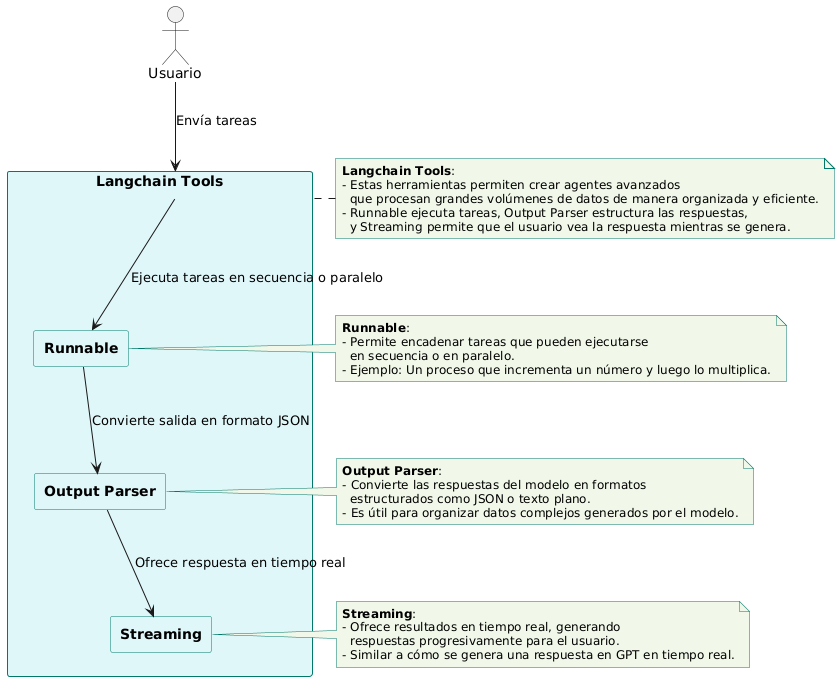

In [83]:
!pip install langchain

In [84]:
from langchain_core.runnables import RunnableLambda

sequence = RunnableLambda(lambda x: x +1 ) | RunnableLambda(lambda x: x * 2 )

In [85]:
sequence.invoke(10)

22

In [86]:
sequence = RunnableLambda(lambda x: x +1 ) | {
    'index_1' : RunnableLambda(lambda x: x * 2 ),
    'index_2' : RunnableLambda(lambda x: x * 5 )
}

In [87]:
sequence.invoke(10)

{'index_1': 22, 'index_2': 55}

In [88]:
!pip install -qU langchain langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 13.1 MB/s eta 0:00:00


In [89]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

In [90]:
model = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 openai_api_key=API_KEY,
                 )

In [91]:
joke_query = 'Tell me a joke'

In [92]:
parser = JsonOutputParser()

In [93]:
prompt = PromptTemplate(
    template = 'Answer the user query. \n{format_instructions}\n{query}',
    input_variables = ['query'],
    partial_variables = { 'format_instructions': parser.get_format_instructions()}
)

In [94]:
chain = prompt | model | parser

In [95]:
response = chain.invoke({"query": joke_query})

In [96]:
response

{'joke': "Why don't scientists trust atoms? Because they make up everything!"}

In [97]:
import time
for s in chain.stream({"query": joke_query}):
  print(s)
  time.sleep(0.3)

{}
{'joke': ''}
{'joke': 'Why'}
{'joke': "Why don't"}
{'joke': "Why don't scientists"}
{'joke': "Why don't scientists trust"}
{'joke': "Why don't scientists trust atoms"}
{'joke': "Why don't scientists trust atoms?"}
{'joke': "Why don't scientists trust atoms? Because"}
{'joke': "Why don't scientists trust atoms? Because they"}
{'joke': "Why don't scientists trust atoms? Because they make"}
{'joke': "Why don't scientists trust atoms? Because they make up"}
{'joke': "Why don't scientists trust atoms? Because they make up everything"}
{'joke': "Why don't scientists trust atoms? Because they make up everything!"}


In [99]:
chunks = []
async for chunk in model.astream(joke_query):
  chunks.append(chunk)
  print(chunk.content, end='', flush=True)
  time.sleep(0.3)

Why don't skeletons fight each other?

They don't have the guts!

# Chat memory
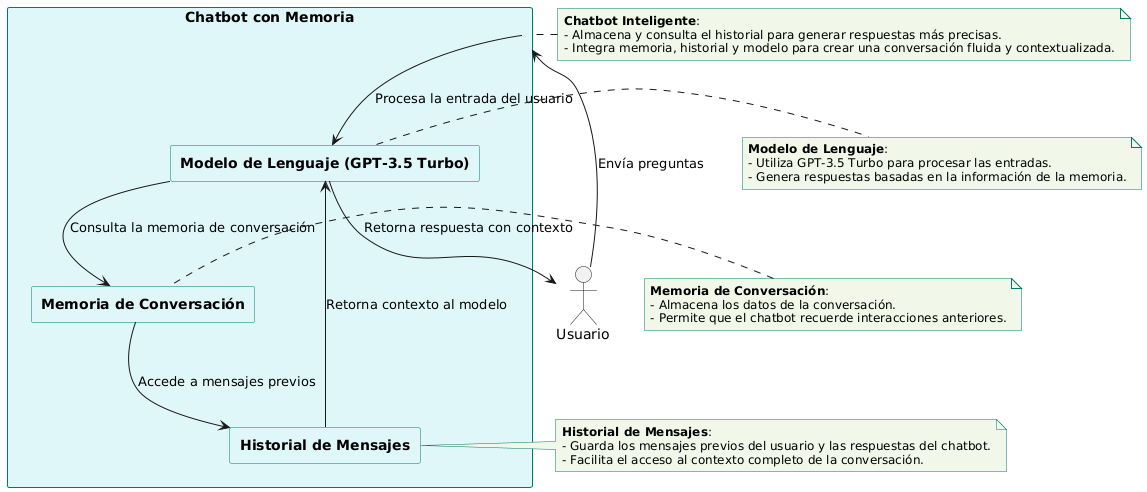

In [100]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

model = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=API_KEY,)

In [101]:
model.invoke([HumanMessage(content='Hi! my name is bob')]).content

'Hello Bob! How can I assist you today?'

In [102]:
model.invoke([HumanMessage(content='What is my name?')]).content

"I'm sorry, I do not know your name. Please feel free to tell me your name so I can address you correctly."

In [103]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm Bob"),
        AIMessage(content="Hello Bob! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
).content

'Your name is Bob.'

In [107]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

In [108]:
store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id] = InMemoryChatMessageHistory()
  return store[session_id]

In [109]:
with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [112]:
config = {'configurable': {'session_id': 'abc2'}}

In [113]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
     config=config
)

In [114]:
response.content

'Hello Bob! How can I help you today?'

In [115]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)

In [116]:
response.content

'Your name is Bob.'

In [117]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4024ab3-015b-4fc9-88de-24ea113b3c4b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Bob.', a

In [118]:
response = with_message_history.invoke(
    [HumanMessage(content='How are you?')],
     config=config
)

In [119]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4024ab3-015b-4fc9-88de-24ea113b3c4b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Bob.', a

In [120]:
config = {'configurable': {'session_id': 'abc3'}}

In [121]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)
response

AIMessage(content="I'm sorry, I do not know your name as we have not been introduced.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 12, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-76cfc708-1b8c-4a95-8f59-5073d0e0fd91-0', usage_metadata={'input_tokens': 12, 'output_tokens': 17, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [122]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Carli')],
     config=config
)
response.content

'Hello Carli! How can I assist you today?'

In [123]:
store

{'abc2': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Bob! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b4024ab3-015b-4fc9-88de-24ea113b3c4b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content='Your name is Bob.', a

# memoria en cadenas

In [124]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', 'You are a helpful assistant. Answer all question to the best of your abity.'
        ),
        MessagesPlaceholder(variable_name='messages')

    ]
)

In [125]:
chain  = prompt | model

In [126]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='Hi! I am Bob')]
    }
)
response.content

'Hello Bob! How can I assist you today?'

In [128]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='What is my name?')]
    }
)
response.content

"I'm sorry, but I do not have the ability to know your name. If you would like to share it with me, feel free to do so."

In [129]:
with_message_history = RunnableWithMessageHistory(chain,get_session_history)

In [130]:
config = { 'configurable': {'session_id': 'abc5'}}

In [133]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
    config=config
)
response.content

'Your name is Bob. How can I assist you, Bob?'

In [132]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config=config
)
response.content

'Hello, Bob! How can I assist you today?'

# Loaders PDF y CSV

In [134]:
%pip install --upgrade --quiet pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.0 MB/s eta 0:00:00


In [135]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00


In [138]:
from langchain_community.document_loaders import PyPDFLoader

file_path = ("/content/1.pdf")
loader = PyPDFLoader(file_path)
pages = loader.load_and_split()

pages[0]

Document(metadata={'source': '/content/1.pdf', 'page': 0}, page_content='Test\xa0document\xa0PDF\xa0\n\xa0\nLorem\xa0ipsum\xa0dolor\xa0sit\xa0amet,\xa0consectetur\xa0adipiscing\xa0elit.\xa0Nulla\xa0est\xa0purus,\xa0ultrices\xa0in\xa0porttitor\xa0\nin,\xa0accumsan\xa0non\xa0quam.\xa0Nam\xa0consectetur\xa0porttitor\xa0rhoncus.\xa0Curabitur\xa0eu\xa0est\xa0et\xa0leo\xa0feugiat\xa0\nauctor\xa0vel\xa0quis\xa0lorem.\xa0Ut\xa0et\xa0ligula\xa0dolor,\xa0sit\xa0amet\xa0consequat\xa0lorem.\xa0Aliquam\xa0porta\xa0eros\xa0sed\xa0\nvelit\xa0imperdiet\xa0egestas.\xa0Maecenas\xa0tempus\xa0eros\xa0ut\xa0diam\xa0ullamcorper\xa0id\xa0dictum\xa0libero\xa0\ntempor.\xa0Donec\xa0quis\xa0augue\xa0quis\xa0magna\xa0condimentum\xa0lobortis.\xa0Quisque\xa0imperdiet\xa0ipsum\xa0vel\xa0\nmagna\xa0viverra\xa0rutrum.\xa0Cras\xa0viverra\xa0molestie\xa0urna,\xa0vitae\xa0vestibulum\xa0turpis\xa0varius\xa0id.\xa0\nVestibulum\xa0mollis,\xa0arcu\xa0iaculis\xa0bibendum\xa0varius,\xa0velit\xa0sapien\xa0blandit\xa0metus,\xa0a

In [147]:
!pip install -qU langchain-openai
!pip install faiss-cpu faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.8 MB/s eta 0:00:00


In [148]:
import os
os.environ["OPENAI_API_KEY"] = API_KEY

In [149]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings

faiss_index = FAISS.from_documents(pages, OpenAIEmbeddings())
docs = faiss_index.similarity_search("Lorem ipsum", k=2)
for doc in docs:
    print(str(doc.metadata["page"]) + ":", doc.page_content[:300])

0: Test document PDF 
 
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla est purus, ultrices in porttitor 
in, accumsan non quam. Nam consectetur porttitor rhoncus. Curabitur eu est et leo feugiat 
auctor vel quis lorem. Ut et ligula dolor, sit amet consequat lorem. Aliquam porta eros sed


In [150]:
from langchain_community.document_loaders.csv_loader import CSVLoader

file_path = (
    "/content/sample_data/california_housing_test.csv"
)

loader = CSVLoader(file_path=file_path)
data = loader.load()

for record in data[:2]:
    print(record)

page_content='longitude: -122.050000
latitude: 37.370000
housing_median_age: 27.000000
total_rooms: 3885.000000
total_bedrooms: 661.000000
population: 1537.000000
households: 606.000000
median_income: 6.608500
median_house_value: 344700.000000' metadata={'source': '/content/sample_data/california_housing_test.csv', 'row': 0}
page_content='longitude: -118.300000
latitude: 34.260000
housing_median_age: 43.000000
total_rooms: 1510.000000
total_bedrooms: 310.000000
population: 809.000000
households: 277.000000
median_income: 3.599000
median_house_value: 176500.000000' metadata={'source': '/content/sample_data/california_housing_test.csv', 'row': 1}


In [151]:
%pip install bs4

In [152]:
from langchain_community.document_loaders import BSHTMLLoader

file_path = '/content/file.html'

loader = BSHTMLLoader(file_path)
data = loader.load()

print(data)

[Document(metadata={'source': '/content/file.html', 'title': 'Inteligencia Artificial'}, page_content='\n\n\n\nInteligencia Artificial\n\n\n\n\nInteligencia Artificial\nExplorando los conceptos, aplicaciones y el futuro de la IA\n\n\n\n¿Qué es la IA?\nAplicaciones\nRetos\nEl Futuro\n\n\n\n\n¿Qué es la Inteligencia Artificial?\nLa Inteligencia Artificial (IA) es una rama de la informática que se enfoca en la creación de sistemas capaces de realizar tareas que normalmente requieren inteligencia humana, como el aprendizaje, la toma de decisiones, la resolución de problemas y la comprensión del lenguaje natural.\n\n\nAplicaciones de la Inteligencia Artificial\n\nAsistentes virtuales (como Alexa, Siri y Google Assistant).\nAutomóviles autónomos.\nSistemas de recomendación (Netflix, YouTube, Amazon).\nReconocimiento de voz e imágenes.\nProcesamiento de lenguaje natural (PLN) y chatbots.\n\n\n\nRetos de la Inteligencia Artificial\nA pesar de sus avances, la IA enfrenta varios desafíos:\n\nPre

# Splitters

In [153]:
%pip install -qU langchain-text-splitters

In [154]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [160]:
with open('/content/1.txt') as f:
  state_of_the_union = f.read()

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


In [161]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=10,
    chunk_overlap=2,
    length_function=len,
    is_separator_regex=False,
)

In [162]:
text = text_splitter.create_documents([state_of_the_union])

In [163]:
text

[Document(metadata={}, page_content='Lorem'),
 Document(metadata={}, page_content='ipsum'),
 Document(metadata={}, page_content='dolor sit'),
 Document(metadata={}, page_content='amet,'),
 Document(metadata={}, page_content='consectet'),
 Document(metadata={}, page_content='etur'),
 Document(metadata={}, page_content='adipiscin'),
 Document(metadata={}, page_content='ing'),
 Document(metadata={}, page_content='elit. Sed'),
 Document(metadata={}, page_content='do'),
 Document(metadata={}, page_content='eiusmod'),
 Document(metadata={}, page_content='tempor'),
 Document(metadata={}, page_content='incididun'),
 Document(metadata={}, page_content='unt'),
 Document(metadata={}, page_content='ut labore'),
 Document(metadata={}, page_content='et dolore'),
 Document(metadata={}, page_content='magna'),
 Document(metadata={}, page_content='aliqua.'),
 Document(metadata={}, page_content='Ut enim'),
 Document(metadata={}, page_content='ad minim'),
 Document(metadata={}, page_content='veniam,'),
 D

In [164]:
text[0]

Document(metadata={}, page_content='Lorem')

In [165]:
text[1]

Document(metadata={}, page_content='ipsum')

In [166]:
!pip install langchain-openai

In [167]:
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()
embeddings = embeddings_model.embed_documents(
    [
        'Hola!',
        'Holas, cómo estás?',
        'Cual es tu nombre?',
        'Me llamo Daniel',
        'Hola Daniel'
    ]
)

In [168]:
embeddings

[[-0.020390646532177925,
  -0.006213074550032616,
  -0.008277707733213902,
  -0.018166212365031242,
  -0.03027275949716568,
  0.01880541816353798,
  -0.013730128295719624,
  -0.0017961666453629732,
  0.004480828531086445,
  -0.0166704710572958,
  0.035463105887174606,
  -0.004656610079109669,
  -0.008450292982161045,
  -0.008642054162919521,
  -0.00415163766592741,
  -0.013359389267861843,
  0.01623581163585186,
  -0.0185241661965847,
  0.022461671382188797,
  -0.0083352355286479,
  -0.027946051210165024,
  -0.0002954326628241688,
  0.012911945581436157,
  -0.022154852747917175,
  -0.009632822126150131,
  8.484450518153608e-05,
  0.009102282114326954,
  -0.021438943222165108,
  0.025299742817878723,
  -0.043900612741708755,
  0.022027011960744858,
  0.013103706762194633,
  -0.013384956866502762,
  -0.00834162812680006,
  -0.0035443929955363274,
  -0.02541479840874672,
  -0.0052574630826711655,
  -0.00862927082926035,
  0.01403694599866867,
  -0.0050593093037605286,
  0.0193934869021177

In [169]:
len(embeddings[0])

1536

In [170]:
embedded_query = embeddings_model.embed_query('Cual es el nombre mencionado en la conversación?')

In [171]:
embedded_query

[-0.0018194098956882954,
 -0.007457492873072624,
 0.03895111009478569,
 -0.0076116533018648624,
 -0.011639084666967392,
 0.02607874386012554,
 -0.014234112575650215,
 0.014426812529563904,
 -0.004178380127996206,
 -0.010091060772538185,
 0.010694853961467743,
 0.022199049592018127,
 -0.002052255906164646,
 0.008054863661527634,
 -0.005703922361135483,
 -0.003458966501057148,
 0.02027204819023609,
 -0.002953128656372428,
 0.03607345372438431,
 -0.021582409739494324,
 -0.008253986947238445,
 0.005424507427960634,
 0.005141880363225937,
 0.007483186200261116,
 -0.014324039220809937,
 0.023676415905356407,
 0.025937430560588837,
 -0.008832086808979511,
 0.007052822969853878,
 -0.023470869287848473,
 0.022109122946858406,
 0.007174866273999214,
 -0.004724363796412945,
 0.004351810086518526,
 -0.04033854976296425,
 -0.016495127230882645,
 0.0025291885249316692,
 -0.02646414376795292,
 0.01861482858657837,
 0.014067105948925018,
 0.02677246369421482,
 -0.0021903575398027897,
 0.00107751460745

# RAG


In [177]:
!pip install -qU langchain langchain_community unstructured langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 4.2 MB/s eta 0:00:00


In [178]:
!pip install --upgrade --quiet pypdf

In [180]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

loader = DirectoryLoader(
    '/content/drive/MyDrive/Talleres',
    glob='**/*.pdf',
    loader_cls=PyPDFLoader
)

In [181]:
pages = loader.load()

In [182]:
pages

[Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 0}, page_content=' \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nEntregable de la  \nIntervención - fortalecimiento  \n \nLínea temática Tecnologías Habiliitantes \nArena Comercio Tec '),
 Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 1}, page_content='Centro - Amazonas \n \n \n \nEl entregable del proceso de intervención en la arena Comercio Tec  ha sido \nelaborado en el marco de la estrategia nacio nal liderada por el Ministerio de \nTecnologías de la información y las comunicaciones (MinTIC), el Ministerio de \nComercio, Industria y Turismo (MinCIT) e iNNpulsa Colombia denominado “Colombia \nPotencIA Digital” la cual cuenta con un pilar enfocado en acelerar los ecosistemas de \ninnovación y transformación digital en Colombia, buscando tran

In [184]:
pages[0]


Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 0}, page_content=' \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nEntregable de la  \nIntervención - fortalecimiento  \n \nLínea temática Tecnologías Habiliitantes \nArena Comercio Tec ')

In [185]:

from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap=20
)
splits = text_splitter.split_documents(pages)

In [186]:
splits


[Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 0}, page_content='Entregable de la'),
 Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 0}, page_content='Entregable de la  \nIntervención - fortalecimiento  \n \nLínea temática Tecnologías Habiliitantes'),
 Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 0}, page_content='Arena Comercio Tec'),
 Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 1}, page_content='Centro - Amazonas'),
 Document(metadata={'source': '/content/drive/MyDrive/Talleres/Putumayo/Formato entregable fortalecimiento Putumayo.pdf', 'page': 1}, page_content='El entregable del proceso de intervención en la arena Comercio Tec  ha sido'),
 Document(metadat

In [188]:
!pip install langchain_chroma


In [189]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents = splits,
    embedding=OpenAIEmbeddings()
)

retriever = vectorstore.as_retriever()

In [190]:
system_prompt = (
    'Eres un asistente que devuelve información de múltiples PDFS, además incluye emojis a cada una de la s respuestas. tienes el siguiente {context}'

)

In [191]:

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model = 'gpt-4o',
    temperature=0,
    max_tokens=150

)

In [192]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

from langchain.chains import create_history_aware_retriever, create_retrieval_chain

In [193]:
contextualize_q_system_prompt = (
    "Responde segun el historial de chat y la última pregunta del usuario "
    "si no está en el historial de chat o en el contexto. NO respondas la pregunta "
    "Además responde de manera profesional a la pregunta del ususario"

)

In [194]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', contextualize_q_system_prompt
        ),
        MessagesPlaceholder('chat_history'),
        ('human', '{input}')
    ]
)

In [195]:
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)

In [196]:
from langchain.chains.combine_documents import create_stuff_documents_chain


In [197]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ('system', system_prompt),
        MessagesPlaceholder('chat_history'),
        ('human', '{input}')
    ]

)


In [198]:

question_answer_chain = create_stuff_documents_chain(
    llm,qa_prompt
)

In [199]:
rag_chain = create_retrieval_chain(
    history_aware_retriever,question_answer_chain
)


In [200]:
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory


store = {}


def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

In [201]:

conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key='input',
    history_messages_key='chat_history',
    output_messages_key='answer'
)

In [203]:
conversational_rag_chain.invoke(
    {
        'input': 'Cual es el resultado de los talleres dados en las regiones'
    },
    config={
        'configurable': {'session_id':'abc123'}
    }
)['answer']

'Los talleres impartidos en las regiones han tenido resultados muy positivos. 🎉 Han logrado aumentar el nivel de satisfacción entre los participantes, quienes han adquirido nuevas habilidades y conocimientos para impulsar sus proyectos de innovación y emprendimiento. Además, estos talleres han fomentado la creación de redes de colaboración entre emprendedores, lo que ha fortalecido la capacidad operativa y la percepción de acceso a recursos y oportunidades. 🤝 En resumen, los talleres han sido un catalizador para el crecimiento y desarrollo del ecosistema emprendedor regional. 🌱'

In [207]:
conversational_rag_chain.invoke(
    {
        'input': 'quien hizo los documentos'
    },
    config={
        'configurable': {'session_id':'abc123'}
    }
)['answer']


conversational_rag_chain.invoke(
    {
        'input': 'cuanto doicumentos eran ?'
    },
    config={
        'configurable': {'session_id':'abc123'}
    }
)['answer']

'No tengo acceso al número exacto de documentos incluidos en el informe de la Comisión Regional de Competitividad e Innovación de diciembre de 2023. 📚 Sin embargo, este tipo de informes generalmente incluye varios documentos que abarcan diferentes aspectos del comercio exterior, la competitividad y la innovación en las regiones. Estos documentos pueden incluir análisis de datos, reportes de talleres, y estrategias de desarrollo, entre otros. 📊✨'

In [208]:

print(conversational_rag_chain.invoke(
    {
        'input': 'Cual es la receta de Avena con Frutas?'
    },
    config={
        'configurable': {'session_id':'abc123'}
    }
)['answer'])


¡Claro! Aquí tienes una receta sencilla y deliciosa de avena con frutas. 🥣🍓

**Ingredientes:**
- 1 taza de avena
- 2 tazas de leche (puede ser de vaca, almendra, soya, etc.)
- 1 cucharadita de miel o azúcar (opcional)
- 1 plátano en rodajas
- 1/2 taza de fresas en rodajas
- 1/4 taza de arándanos
- 1/4 taza de nueces o almendras picadas (opcional)
- Canela al gusto

**Instrucciones:**

1. **Cocinar la avena:** En una cacer


# Tools

In [209]:

import sqlite3

import requests
from langchain_community.utilities.sql_database import SQLDatabase
from sqlalchemy import create_engine
from sqlalchemy.pool import StaticPool


def get_engine_for_chinook_db():
    """Pull sql file, populate in-memory database, and create engine."""
    url = "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sql"
    response = requests.get(url)
    sql_script = response.text

    connection = sqlite3.connect(":memory:", check_same_thread=False)
    connection.executescript(sql_script)
    return create_engine(
        "sqlite://",
        creator=lambda: connection,
        poolclass=StaticPool,
        connect_args={"check_same_thread": False},
    )


engine = get_engine_for_chinook_db()

db = SQLDatabase(engine)

In [210]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model='gpt-4o',
                 temperature=0,
                 max_tokens = 100)

In [212]:
from langchain_community.agent_toolkits.sql.toolkit import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=db, llm=llm)


SQLDatabaseToolkit(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7da96c6547c0>, llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7da9619f9e10>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7da9619fac50>, root_client=<openai.OpenAI object at 0x7da961a77220>, root_async_client=<openai.AsyncOpenAI object at 0x7da9619f9e40>, model_name='gpt-4o', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=100))

# Agente

In [217]:
import os

from google.colab import userdata
TAVILY = userdata.get('TAVILY')

os.environ['TAVILY_API_KEY'] = TAVILY

In [218]:
!pip install langchain_community


In [219]:
from langchain_community.tools.tavily_search import TavilySearchResults
search = TavilySearchResults(max_results=2)

In [220]:
search.invoke("que es openai o1-mini")


[{'url': 'https://www.datacamp.com/es/blog/open-ai-o1',
  'content': 'OpenAI o1 es una nueva serie de modelos de OpenAI que destacan en tareas de razonamiento complejas, utilizando el razonamiento en cadena para superar a GPT-4o en áreas como las matemáticas, la codificación y la ciencia. Los resultados revelan una clara preferencia por la revisión o1 en áreas que dependen en gran medida del razonamiento, como el análisis de datos, la codificación y las matemáticas. Junto al modelo completo o1-preview, OpenAI también ha lanzado o1-mini, una variante más pequeña y rápida diseñada para proporcionar un punto de entrada más accesible a los desarrolladores e investigadores que exploran las capacidades de la serie o1. OpenAI o1 es un nuevo modelo de IA centrado en tareas de razonamiento complejas como las matemáticas, la codificación y los rompecabezas.'},
 {'url': 'https://openai.com/index/openai-o1-mini-advancing-cost-efficient-reasoning/',
  'content': "OpenAI o1-mini We're releasing Open

In [221]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [222]:
loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()

documents = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
).split_documents(docs)

vector = FAISS.from_documents(documents, OpenAIEmbeddings())
retriever = vector.as_retriever()

In [223]:
retriever.invoke("how to upload a dataset")[0]


Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications.', 'language': 'en'}, page_content='Run the evaluationexperiment_results = client.evaluate(    dummy_app, # Your AI system goes here    data=dataset, # The data to predict and grade over    evaluators=[exact_match], # The evaluators to score the results    experiment_prefix="sample-experiment", # The name of the experiment    metadata={"version": "1.0.0", "revision_id": "beta"}, # Metadata about the experiment    max_concurrency=4,  # Add concurrency.)# Analyze the results via the UI or programmatically# If you have \'pandas\' installed you can view the results as a# pandas DataFrame by uncommenting below:# experiment_results.to_pandas()import { Client } from "langsmith";import { EvaluationResult, evaluate } from "langsmith/evaluation";const client = ne

In [224]:
from langchain.tools.retriever import create_retriever_tool

txt = '''Busca información sobre LangSmith.
¡Para cualquier pregunta sobre LangSmith,
debes usar esta herramienta!'''

retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    txt,)

In [225]:
tools = [search, retriever_tool]


In [226]:
model_with_tools = model.bind_tools(tools)


In [227]:
from langchain_core.messages import HumanMessage
response = model_with_tools.invoke([HumanMessage(content="Hi!")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: Hello! How can I assist you today?
ToolCalls: []


In [228]:
response = model_with_tools.invoke([HumanMessage(content=
                            "What's the weather in SF?")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: 
ToolCalls: [{'name': 'tavily_search_results_json', 'args': {'query': 'weather in San Francisco'}, 'id': 'call_U5BzpULY8MKNzCTvcaYeRj2l', 'type': 'tool_call'}]


In [229]:

from langchain import hub

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [230]:

from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(model, tools, prompt)

In [231]:

from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools)

In [232]:
agent_executor.invoke({"input": "hi!"})


{'input': 'hi!', 'output': 'Hello! How can I assist you today?'}

In [233]:
print(agent_executor.invoke({"input": "Como intalar LangSmith?"})['output'])


Para instalar LangSmith, sigue estos pasos:

1. Instala LangSmith utilizando pip para Python o yarn para TypeScript:
   - Para Python: `pip install -U langsmith openai`
   - Para TypeScript: `yarn add langsmith openai`

2. Crea una clave de API:
   - Dirígete a la página de Configuración y haz clic en "Crear clave de API".

3. Configura tu entorno:
   - Exporta las variables de entorno necesarias:
     ```
     export LANGCHAIN_TRACING_V2=true
     export LANGCHAIN_API_KEY=<tu-clave-de-api>
     export OPENAI_API_KEY=<tu-clave-de-openai>
     ```

4. Registra tu primera traza:
   - Si estás utilizando LangChain/LangGraph, no es necesario usar directamente el SDK de LangSmith. Puedes consultar la guía de cómo registrar trazas con LangChain en la [documentación](https://langsmith.com/docs).

¡Una vez que hayas seguido estos pasos, estarás listo para utilizar LangSmith para construir aplicaciones de LLM de calidad de producción!


In [234]:
agent_executor.invoke({"input": "Mi nombre es Bob", "chat_history": []})

{'input': 'Mi nombre es Bob',
 'chat_history': [],
 'output': '¡Hola Bob! ¿En qué puedo ayudarte hoy?'}

In [235]:

from langchain_core.messages import AIMessage, HumanMessage
agent_executor.invoke(
    {
        "chat_history": [
            HumanMessage(content="Mi nombre es Bob"),
            AIMessage(content="Hola Bob! ¿En qué puedo ayudarte hoy?"),
        ],
        "input": "Cuál es mi nombre?",
    }
)

{'chat_history': [HumanMessage(content='Mi nombre es Bob', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hola Bob! ¿En qué puedo ayudarte hoy?', additional_kwargs={}, response_metadata={})],
 'input': 'Cuál es mi nombre?',
 'output': 'Tu nombre es Bob. ¿Hay algo más en lo que pueda ayudarte, Bob?'}

In [236]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

In [237]:

agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [238]:

agent_with_chat_history.invoke(
    {"input": "what's my name?"},
    config={"configurable": {"session_id": ""}},
)

{'input': "what's my name?",
 'chat_history': [],
 'output': "I'm sorry, but I don't have access to your personal information such as your name. If there's anything specific you'd like to know or discuss, feel free to let me know!"}